# Import libraries:

In [93]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

# Dataset:

In [94]:
df = pd.read_csv("/dataset.csv")
new_df = df.loc[(df['rpt_key'] == 'btc_usd')]
new_df

date_id          datetime_id    market  rpt_key     last  diff_24h  \
3       2017-05-31  2017-06-01 00:00:00  bitstamp  btc_usd  2237.40   2239.37   
4       2017-05-31  2017-06-01 00:00:00    okcoin  btc_usd  2318.82   2228.70   
15      2017-06-01  2017-06-01 00:01:00  bitstamp  btc_usd  2248.39   2242.44   
16      2017-06-01  2017-06-01 00:01:00    okcoin  btc_usd  2320.42   2228.40   
23      2017-06-01  2017-06-01 00:02:00  bitstamp  btc_usd  2248.35   2238.58   
...            ...                  ...       ...      ...      ...       ...   
627164  2017-07-14  2017-07-14 13:16:00    okcoin  btc_usd  2394.03   2500.01   
627173  2017-07-14  2017-07-14 13:17:00  bitstamp  btc_usd  2320.47   2407.06   
627174  2017-07-14  2017-07-14 13:17:00    okcoin  btc_usd  2394.03   2500.01   
627183  2017-07-14  2017-07-14 13:18:00  bitstamp  btc_usd  2320.47   2408.00   
627184  2017-07-14  2017-07-14 13:18:00    okcoin  btc_usd  2394.03   2500.01   

        diff_per_24h      bid      ask      low     high        volume  \
3          -0.087971  2233.09  2237.40  2154.28  2293.46  13681.282017   
4           4.043613  2319.40  2319.99  2129.78  2318.82   4241.641516   
15          0.265336  2247.77  2248.38  2154.28  2293.46  13701.698603   
16          4.129420  2320.99  2321.49  2129.78  2322.00   4260.261516   
23          0.436437  2248.35  2248.69  2154.28  2293.46  13742.110913   
...              ...      ...      ...      ...      ...           ...   
627164     -4.239183  2394.35  2405.72  2378.02  2529.20   1111.540000   
627173     -3.597335  2320.48  2322.55  2307.46  2413.60   7969.263583   
627174     -4.239183  2394.42  2405.69  2378.02  2529.20   1111.540000   
627183     -3.634967  2320.57  2322.55  2307.46  2413.60   7968.970715   
627184     -4.239183  2394.17  2405.69  2378.02  2529.20   1111.221000   

                 created_at           updated_at  
3       2017-05-31 14:59:36  2017-05-31 14:59:36  
4       2017-05-31 14:59:36  2017-05-31 14:59:36  
15      2017-05-31 15:00:36  2017-05-31 15:00:36  
16      2017-05-31 15:00:36  2017-05-31 15:00:36  
23      2017-05-31 15:01:36  2017-05-31 15:01:36  
...                     ...                  ...  
627164  2017-07-14 04:15:20  2017-07-14 04:15:20  
627173  2017-07-14 04:16:20  2017-07-14 04:16:20  
627174  2017-07-14 04:16:20  2017-07-14 04:16:20  
627183  2017-07-14 04:17:20  2017-07-14 04:17:20  
627184  2017-07-14 04:17:20  2017-07-14 04:17:20  

[125438 rows x 14 columns]

In [95]:
new_df = new_df.reset_index(drop=True)
new_df['datetime'] = pd.to_datetime(new_df['datetime_id'])

In [96]:
new_df = new_df[['datetime', 'last', 'diff_24h', 'diff_per_24h', 'bid', 'ask', 'low', 'high', 'volume']]
new_df

datetime     last  diff_24h  diff_per_24h      bid      ask  \
0      2017-06-01 00:00:00  2237.40   2239.37     -0.087971  2233.09  2237.40   
1      2017-06-01 00:00:00  2318.82   2228.70      4.043613  2319.40  2319.99   
2      2017-06-01 00:01:00  2248.39   2242.44      0.265336  2247.77  2248.38   
3      2017-06-01 00:01:00  2320.42   2228.40      4.129420  2320.99  2321.49   
4      2017-06-01 00:02:00  2248.35   2238.58      0.436437  2248.35  2248.69   
...                    ...      ...       ...           ...      ...      ...   
125433 2017-07-14 13:16:00  2394.03   2500.01     -4.239183  2394.35  2405.72   
125434 2017-07-14 13:17:00  2320.47   2407.06     -3.597335  2320.48  2322.55   
125435 2017-07-14 13:17:00  2394.03   2500.01     -4.239183  2394.42  2405.69   
125436 2017-07-14 13:18:00  2320.47   2408.00     -3.634967  2320.57  2322.55   
125437 2017-07-14 13:18:00  2394.03   2500.01     -4.239183  2394.17  2405.69   

            low     high        volume  
0       2154.28  2293.46  13681.282017  
1       2129.78  2318.82   4241.641516  
2       2154.28  2293.46  13701.698603  
3       2129.78  2322.00   4260.261516  
4       2154.28  2293.46  13742.110913  
...         ...      ...           ...  
125433  2378.02  2529.20   1111.540000  
125434  2307.46  2413.60   7969.263583  
125435  2378.02  2529.20   1111.540000  
125436  2307.46  2413.60   7968.970715  
125437  2378.02  2529.20   1111.221000  

[125438 rows x 9 columns]

In [97]:
new_df = new_df[['last']]
dataset = new_df.values
dataset = dataset.astype('float32')

In [98]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [99]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = train_test_split(dataset, test_size=test_size, shuffle=False, random_state=42)
print(len(train), len(test))

87806 37632


In [100]:
def create_dataset(dataset, prev_pred=1):
    x = []
    y = []
    
    for i in range(len(dataset) - prev_pred - 1):
        a = dataset[i:(i + prev_pred), 0]
        x.append(a)
        y.append(dataset[i + prev_pred, 0])
    
    x = np.array(x)
    y = np.array(y)
    
    return x, y

In [101]:
prev_pred = 10
x_train, y_train = create_dataset(train, prev_pred=prev_pred)
x_test, y_test = create_dataset(test, prev_pred=prev_pred)

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

#  Linear Regression:

In [102]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[2]))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

regressor = LinearRegression()
regressor.fit(x_test, y_test)

LinearRegression()

In [103]:
linear_pred = regressor.predict(x_test)

In [104]:
mae_linear = mean_absolute_error(y_test, linear_pred)
r2_linear = r2_score(y_test, linear_pred)
variance_linear = explained_variance_score(y_test, linear_pred)

print("Testing set:")
print("MAE: ", mae_linear)
print("R2-score: ", r2_linear)
print("Variance score: ", variance_linear)

Testing set:
MAE:  0.0028473581
R2-score:  0.9980484180203503
Variance score:  0.9980484247207642


In [105]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'LR_pred': linear_pred.flatten()})
result['Difference'] = result['LR_pred'] - result['Actual']
result

Actual   LR_pred  Difference
0      0.219734  0.219454   -0.000279
1      0.382696  0.376220   -0.006476
2      0.217565  0.219993    0.002428
3      0.377469  0.380244    0.002775
4      0.222939  0.218508   -0.004431
...         ...       ...         ...
37616  0.090088  0.088755   -0.001333
37617  0.165713  0.176310    0.010597
37618  0.087887  0.089991    0.002104
37619  0.165713  0.168165    0.002452
37620  0.087887  0.087725   -0.000162

[37621 rows x 3 columns]

In [106]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result.index, y=result['Actual'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=result.index, y=result['LR_pred'], mode='lines', name='Predicted'))

fig.update_layout(
    title='Actual vs Predicted for Linear Regression',
    xaxis_title='Index',
    yaxis_title='Value',
    showlegend=True,
    legend=dict(x=0, y=1),
)

fig.show()

# Dataset for LSTM:

## LSTM

In [107]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, prev_pred)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
686/686 - 4s - loss: 0.0189 - 4s/epoch - 6ms/step
Epoch 2/10
686/686 - 3s - loss: 2.0544e-04 - 3s/epoch - 4ms/step
Epoch 3/10
686/686 - 2s - loss: 1.1421e-04 - 2s/epoch - 3ms/step
Epoch 4/10
686/686 - 2s - loss: 1.0297e-04 - 2s/epoch - 3ms/step
Epoch 5/10
686/686 - 2s - loss: 9.4093e-05 - 2s/epoch - 3ms/step
Epoch 6/10
686/686 - 2s - loss: 8.5516e-05 - 2s/epoch - 3ms/step
Epoch 7/10
686/686 - 2s - loss: 7.6844e-05 - 2s/epoch - 4ms/step
Epoch 8/10
686/686 - 2s - loss: 6.7557e-05 - 2s/epoch - 4ms/step
Epoch 9/10
686/686 - 2s - loss: 5.8602e-05 - 2s/epoch - 3ms/step
Epoch 10/10
686/686 - 3s - loss: 5.1216e-05 - 3s/epoch - 4ms/step


In [108]:
prev_pred = 10
x_train, y_train = create_dataset(train, prev_pred=prev_pred)
x_test, y_test = create_dataset(test, prev_pred=prev_pred)

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

1176/1176 [==============================] - 2s 2ms/step


In [109]:
pred_train = scaler.inverse_transform(pred_train)
y_train = scaler.inverse_transform([y_train])
pred_test = scaler.inverse_transform(pred_test)
y_test = scaler.inverse_transform([y_test])

In [111]:
pred_plot_train = np.empty_like(dataset)
pred_plot_train[:, :] = np.nan
pred_plot_train[prev_pred:len(pred_train) + prev_pred, :] = pred_train

In [112]:
pred_plot_test = np.empty_like(dataset)
pred_plot_test[:, :] = np.nan
pred_plot_test[len(pred_train) + (prev_pred * 2) + 1:len(dataset) - 1, :] = pred_test

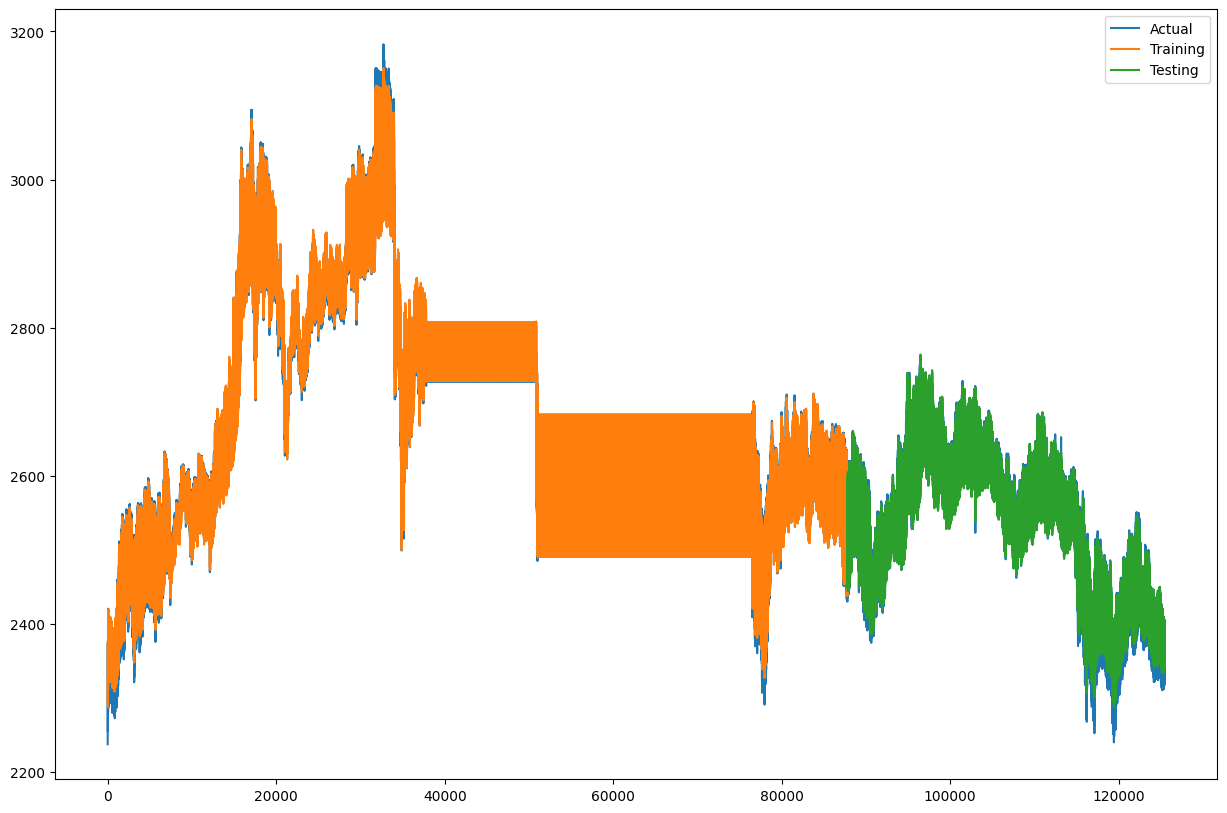

In [113]:
plt.figure(figsize=(15, 10))
plt.plot(new_df['last'], label='Actual')
plt.plot(pd.DataFrame(pred_plot_train, columns=["close"], index=new_df.index).close, label='Training')
plt.plot(pd.DataFrame(pred_plot_test, columns=["close"], index=new_df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [114]:
mae_train = mean_absolute_error(y_train[0], pred_train[:, 0])
mae_test = mean_absolute_error(y_test[0], pred_test[:, 0])
r2_train = r2_score(y_train[0], pred_train[:, 0])
r2_test = r2_score(y_test[0], pred_test[:, 0])
variance_train = explained_variance_score(y_train[0], pred_train[:, 0])
variance_test = explained_variance_score(y_test[0], pred_test[:, 0])

print("Testing set:")
print("MAE: ", mae_test)
print("R2-score: ", r2_test)
print("Variance score: ", variance_test)

Testing set:
MAE:  6.159488530380121
R2-score:  0.9930724591656218
Variance score:  0.9931380777346318


In [115]:
result = pd.DataFrame({'Actual': y_test[0], 'Predicted': pred_test[:, 0]})
result['Difference'] = result['Predicted'] - result['Actual']
result

Actual    Predicted  Difference
0      2445.090141  2445.058105   -0.032035
1      2599.120183  2586.511230  -12.608953
2      2443.040124  2446.550537    3.510414
3      2594.180041  2588.126221   -6.053820
4      2448.120209  2447.549316   -0.570892
...            ...          ...         ...
37616  2322.549956  2341.908203   19.358247
37617  2394.030134  2403.632568    9.602434
37618  2320.469968  2342.098633   21.628665
37619  2394.030134  2404.827881   10.797747
37620  2320.469968  2341.091309   20.621341

[37621 rows x 3 columns]

In [116]:
dfig = go.Figure()
fig.add_trace(go.Scatter(x=result.index, y=result['Actual'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=result.index, y=result['Predicted'], mode='lines', name='Predicted'))

fig.update_layout(
    title='Actual vs Predicted for LSTM',
    xaxis_title='Index',
    yaxis_title='Value',
    showlegend=True,
    legend=dict(x=0, y=1),
)

fig.show()